## Predicting House Prices In Bengaluru ([Machine Hack](https://www.machinehack.com/course/predicting-house-prices-in-bengaluru/)]

##### The train and test data will consist of various features that describe that property in Bengaluru. This is an actual data set that is curated over months of primary & secondary research by our team. Each row contains fixed size object of features. There are 9 features and each feature can be accessed by its name.

##### Features

    Area_type – describes the area
    Availability – when it can be possessed or when it is ready(categorical and time-series)
    Location – where it is located in Bengaluru
    Price – Value of the property in lakhs(INR)
    Size – in BHK or Bedroom (1-10 or more)
    Society – to which society it belongs
    Total_sqft – size of the property in sq.ft
    Bath – No. of bathrooms
    Balcony – No. of the balcony

##### Problem Statement

With the given 9 features(categorical and continuous) build a model to predict the price of houses in Bengaluru.

### I ran all the code in anaconda jupyter notebook

#### Dependencies used
    1. Numpy
    2. Pandas
    3. Matplotlib
    4. Seaborn
    5. Scikit-learn
    6. Catboost
    7. Collections
    8. Scipy
    9. Statsmodels

## Note:
###### Here, I changed the Price and Total_sqft feature to the logrithmic form. So, after doing all the modeling you should change the logrithmic form Price and Total_sqft to exponential form like np.exp(prediction) 

##### Install Catboost

In [ ]:
!pip install catboost

#### Import dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
import scipy.stats as st
import statsmodels.api as sm

C:\Users\sngupta\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
plt.rcParams['figure.figsize']= (15, 12)
plt.style.use('ggplot')
sns.set(style= 'darkgrid', color_codes= True)

#### Read data

In [6]:
train= pd.read_csv('Predicting-House-Prices-In-Bengaluru-Train-Data.csv')
test= pd.read_csv('Predicting-House-Prices-In-Bengaluru-Test-Data.csv')
samp= pd.read_excel('House_-Sample_Submission.xlsx')

In [7]:
train.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [8]:
train.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [9]:
test.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN


#### Data preprocessing

In [10]:
train.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [11]:
train.shape

(13320, 9)

In [12]:
import re

In [13]:
def clean_totalsqft(total_sqft):
    total_sqft= total_sqft.str.split('-')
    for i in range(len(total_sqft)):
        #if total_sqft[i][0].isdigit()==False:
            #total_sqft[i][0]= total_sqft[i][0].str.split('')
        try:
            if len(total_sqft.iloc[i])>1:
                total_sqft.iloc[i]= str(float(total_sqft.iloc[i][0])+float(total_sqft.iloc[i][1]))/2
                total_sqft.iloc[1]= total_sqft.iloc[i][0]
            #if len(total_sqft.iloc[i]==1):
            #    total_sqft.iloc[i]= total_sqft.iloc[i].astype(float)
        
        except:
            pass

    return total_sqft

In [14]:
sqft= clean_totalsqft(train['total_sqft'])

In [15]:
sqft= [sq[0] for sq in sqft]

In [16]:
train['total_sqft']= sqft

In [17]:
def clean_total_sqft(total_sqft):
    
    for sq in range(len(total_sqft)):
        if total_sqft[sq].isdigit()== False:
            #print(total_sqft[sq])
            #total_sqft[sq]= total_sqft[sq].split(' ')
                #print(total_sqft[sq])
            #total_sqft[sq]= ''.join(total_sqft[sq])
                #print(total_sqft[sq])
            total_sqft[sq]= re.split(r'([A-Z])', total_sqft[sq], 1, flags= re.I)
                #print(total_sqft[sq])
                #try:
            if len(total_sqft[sq])>1:
                if total_sqft[sq][2]== 'q. Meter':
                    #print(total_sqft[sq])
                    num= total_sqft[sq][0]
                    #print(num)
                    total_sqft[sq]= str(float(num)*10.7639)
                    #print(total_sqft[sq])
                elif total_sqft[sq][2]== 'q. Yards':
                    #print(total_sqft[sq])
                    num= total_sqft[sq][0]
                    #print(num)
                    total_sqft[sq]= str(float(num)*9)
                    #print(total_sqft[sq])
                elif total_sqft[sq][2]== 'erch':
                    #print(total_sqft[sq])
                    num= total_sqft[sq][0]
                    #print(num)
                    total_sqft[sq]= str(float(num)*272.25)
                    #print(total_sqft[sq])
                elif total_sqft[sq][2]== 'cres':
                    #print(total_sqft[sq])
                    num= total_sqft[sq][0]
                    #print(num)
                    total_sqft[sq]= str(float(num)*43560)
                    #print(total_sqft[sq])
                elif total_sqft[sq][2]== 'untha':
                    #print(total_sqft[sq])
                    num= total_sqft[sq][0]
                    #print(num)
                    total_sqft[sq]= str(float(num)*1089.087)
                    #print(total_sqft[sq])
                elif total_sqft[sq][2]== 'ents':
                    #print(total_sqft[sq])
                    num= total_sqft[sq][0]
                    #print(num)
                    total_sqft[sq]= str(float(num)*435.6)
                    #print(total_sqft[sq])
                elif total_sqft[sq][2]== 'rounds':
                    #print(total_sqft[sq])
                    num= total_sqft[sq][0]
                    #print(num)
                    total_sqft[sq]= str(float(num)*2400)
                    #print(total_sqft[sq])
                #except:
                #    pass
    return total_sqft

In [18]:
sqft= clean_total_sqft(train['total_sqft'])

In [19]:
for i in range(len(sqft)):
    if type(sqft[i])== list:
        sqft[i]= sqft[i][0]

In [20]:
train['total_sqft']= sqft

In [21]:
train['total_sqft']= train['total_sqft'].astype(float)

In [22]:
train['total_sqft'].describe()

count    1.332000e+04
mean     1.908577e+03
std      1.727680e+04
min      1.000000e+00
25%      1.100000e+03
50%      1.275000e+03
75%      1.680000e+03
max      1.306800e+06
Name: total_sqft, dtype: float64

In [23]:
#simply do with test data
sqft_test= clean_totalsqft(test['total_sqft'])

In [24]:
sqft_test= [sq_[0] for sq_ in sqft_test]

In [25]:
test['total_sqft']= sqft_test

In [26]:
sqft_test= clean_total_sqft(test['total_sqft'])

In [27]:
for i in range(len(sqft_test)):
    if type(sqft_test[i])== list:
        sqft_test[i]= sqft_test[i][0]

In [28]:
test['total_sqft']= sqft_test

In [29]:
test['total_sqft']= test['total_sqft'].astype(float)

In [30]:
test['total_sqft'].describe()

count      1480.000000
mean       1691.009959
std        5678.722753
min          40.000000
25%        1109.750000
50%        1300.000000
75%        1717.000000
max      217800.000000
Name: total_sqft, dtype: float64

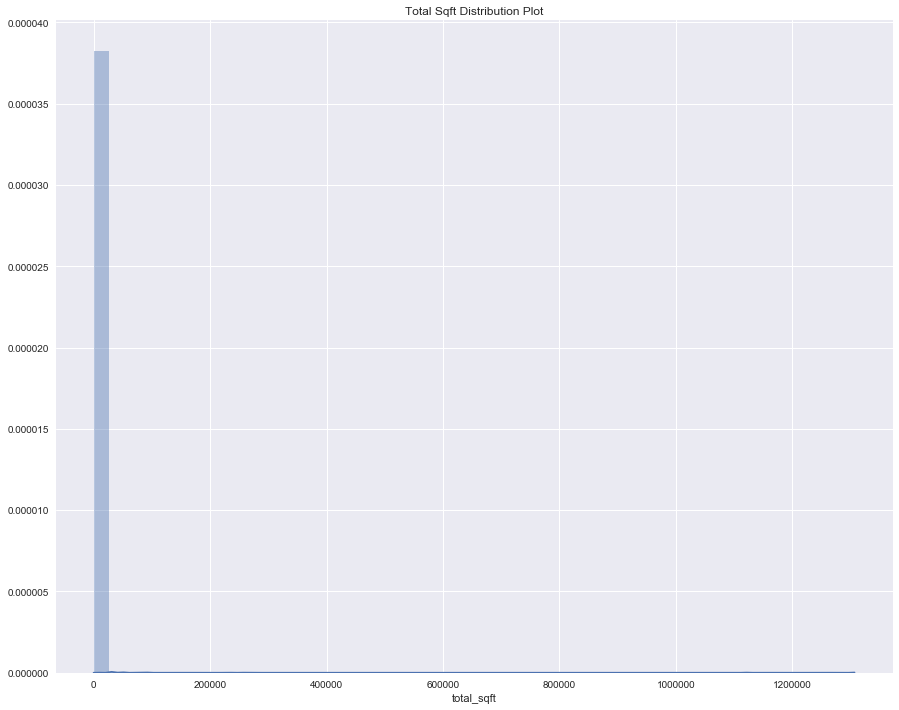

In [31]:
#plot the distribution plot
sns.distplot(train['total_sqft'], bins= 50)
plt.title('Total Sqft Distribution Plot')
plt.show()

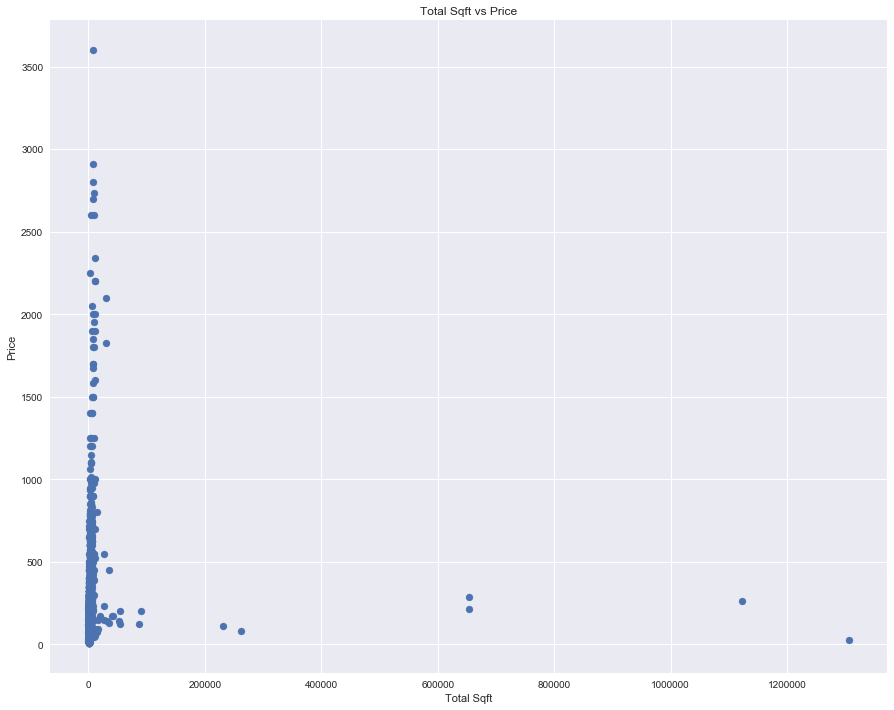

In [32]:
plt.scatter(train['total_sqft'], train['price'])
plt.title('Total Sqft vs Price')
plt.xlabel('Total Sqft')
plt.ylabel('Price')
plt.show()

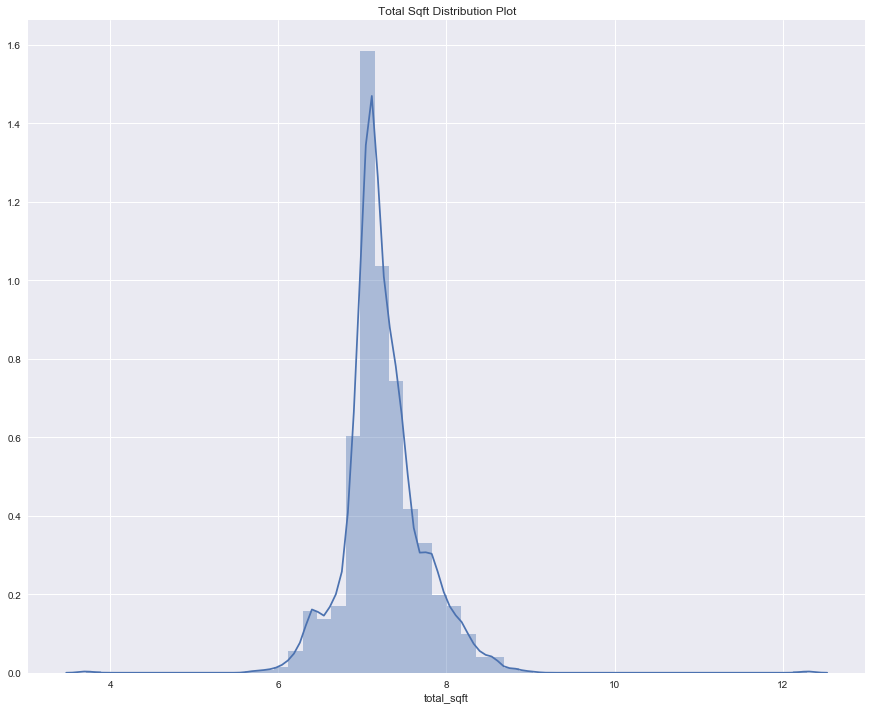

In [33]:
sns.distplot(np.log(test['total_sqft']+1), bins= 50)
plt.title('Total Sqft Distribution Plot')
plt.show()

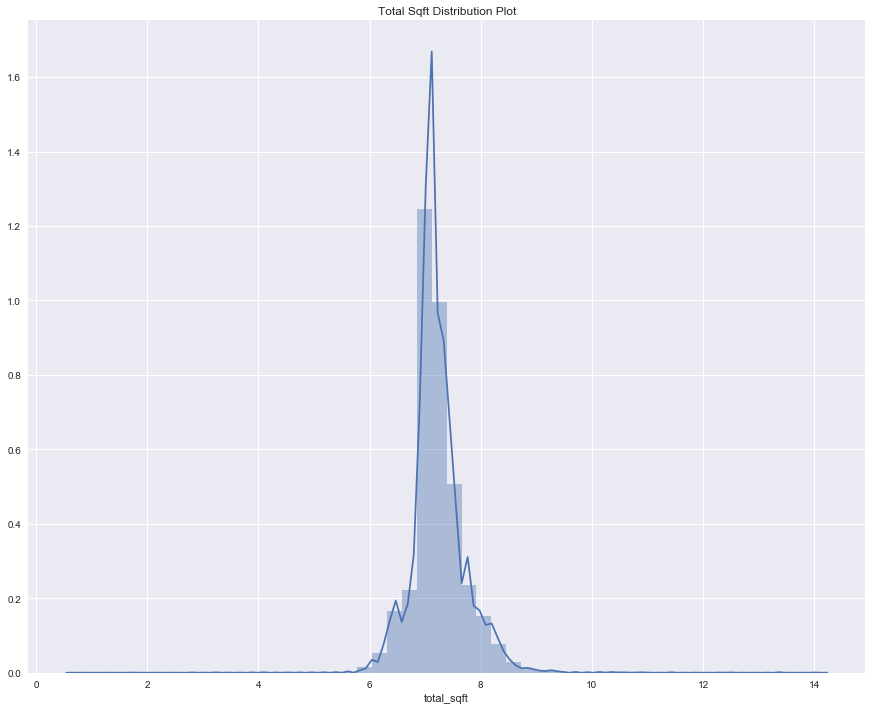

In [34]:
sns.distplot(np.log(train['total_sqft']+1), bins= 50)
plt.title('Total Sqft Distribution Plot')
plt.show()

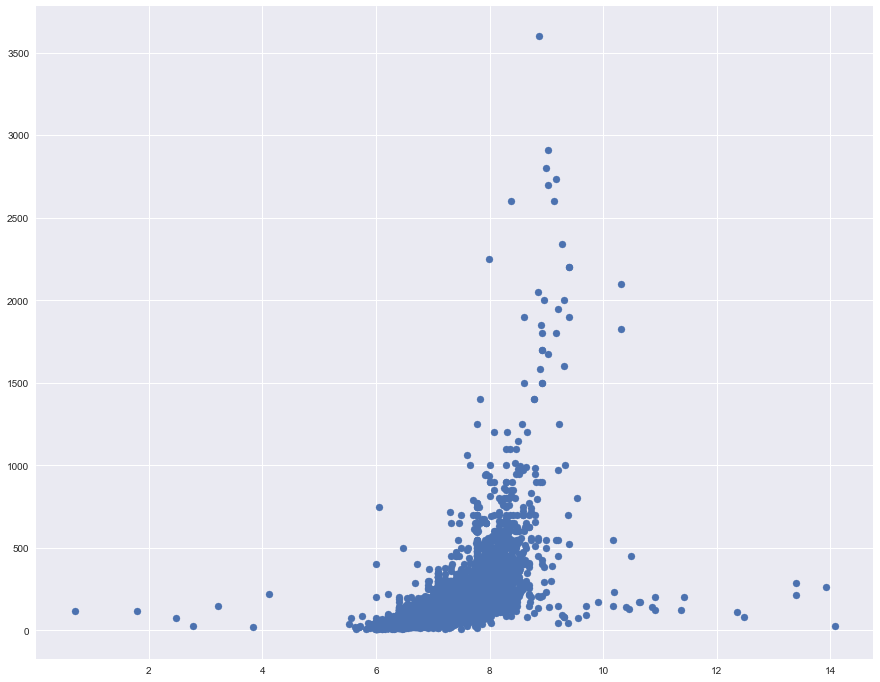

In [35]:
plt.scatter(np.log(train['total_sqft']+1), train['price'])

In [36]:
train.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [37]:
test.isnull().sum()

area_type          0
availability       0
location           0
size               2
society          626
total_sqft         0
bath               7
balcony           69
price           1480
dtype: int64

In [38]:
train['size'].describe()

count     13304
unique       31
top       2 BHK
freq       5199
Name: size, dtype: object

In [39]:
train['location'].describe()

count          13319
unique          1305
top       Whitefield
freq             540
Name: location, dtype: object

In [40]:
train['balcony'].unique()

array([ 1.,  3., nan,  2.,  0.])

In [41]:
train['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [42]:
test.shape

(1480, 9)

In [43]:
target= train['price']

In [44]:
train['society'].fillna('Not Known', inplace= True)
test['society'].fillna('Not Known', inplace= True)

In [45]:
train['location'].fillna(train['location'].mode()[0], inplace= True)
test['location'].fillna(test['location'].mode()[0], inplace= True)

In [46]:
train['size'].fillna(train['size'].mode()[0], inplace= True)
test['size'].fillna(test['size'].mode()[0], inplace= True)

In [47]:
train['bath'].fillna(train['bath'].mode()[0], inplace= True)
test['bath'].fillna(train['bath'].mode()[0], inplace= True)

train['balcony'].fillna(0, inplace= True)
test['balcony'].fillna(0, inplace= True)

In [48]:
train.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

In [49]:
train['bath']= train['bath'].astype(int)
test['bath']= test['bath'].astype(int)

train['balcony']= train['balcony'].astype(int)
test['balcony']= test['balcony'].astype(int)

In [50]:
train.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2,1,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5,3,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Not Known,1440.0,2,3,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3,1,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Not Known,1200.0,2,1,51.00


In [51]:
test.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225.0,2,2,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,Not Known,2400.0,9,2,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650.0,5,2,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322.0,3,1,NaN
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161.0,2,1,NaN


In [52]:
train_new= train.copy()
test_new= test.copy()

#### Machine learning implementation

In [53]:
import catboost as cb

In [54]:
from sklearn.model_selection import KFold

In [55]:
cat_feat_index= np.where(train_new.dtypes!= np.float)[0]

In [56]:
train_new['price']= np.log(train_new['price']+1)
train_new['total_sqft']= np.log(train_new['total_sqft']+1)

test_new['price']= np.log(test_new['price']+1)
test_new['total_sqft']= np.log(test_new['total_sqft']+1)

In [57]:
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error

In [120]:
def run_CB(train, target, test, cat_feat_index= cat_feat_index):
    #from sklearn.model_selection import train_test_split
    from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error
    #X_train, X_test, y_train, y_test= train_test_split(train, target, random_state= 0)
    
    r_squared_1= []
    mse_1= []
    rmse_1= []
    rmsle_1= []
    y_test_1= []
    #msle_1= []
    
    kf = KFold(n_splits=10, shuffle= True, random_state= 0) 

    for train_index, test_index in kf.split(train, target):
        #print("Train:", train_index, "Validation:",test_index)
        X_train, X_test = train.loc[train_index,:], train.loc[test_index,:] 
        y_train, y_test = target[train_index], target[test_index]
    
        param_cb= {}
        param_cb['iterations']= 10000
        param_cb['learning_rate']= 0.08
        #param_cb['max_depth']= 3
        #param_cb['random_seed']= i

        model= cb.CatBoostRegressor(**param_cb)

        #model.fit(X_train, y_train, cat_feat_index, eval_set= (X_test, y_test), early_stopping_rounds= 50, verbose= 1000)
        model.fit(X_train, y_train, cat_feat_index, eval_set= (X_test, y_test), verbose= 1000)


        y_pred= model.predict(X_test)
        #y_pred_1.append(y_pred)
        y_test_= model.predict(test)
        y_test_1.append(y_test_)
        
        r_squared= r2_score(y_test, y_pred)
        mse= mean_squared_error(y_test, y_pred)
        rmse= np.sqrt(mse)
        msle= mean_squared_log_error(y_test, y_pred)
        rmsle= np.sqrt(msle)
        
        r_squared_1.append(r_squared)
        mse_1.append(mse)
        rmse_1.append(rmse)
        rmsle_1.append(rmsle)
        #msle_1.append(msle)
    print('The R-Squared value: {:.4f}' .format(np.mean(r_squared_1)))
    print('Mean Squared Error: {:.4f}' .format(np.mean(mse_1)))
    print('Root Mean Squared Error: {:.4f}' .format(np.mean(rmse_1)))
    print('Root Mean Squared Log Error: {:.4f}' .format(np.mean(rmsle_1)))

    return np.mean(y_test_1, axis= 0)

In [121]:
pred_60= run_CB(train_new.drop(['price'], axis= 1), train_new['price'], test_new.drop(['price'], axis= 1))

0:	learn: 4.1191849	test: 4.0920227	best: 4.0920227 (0)	total: 65.8ms	remaining: 10m 58s
1000:	learn: 0.2826104	test: 0.3044579	best: 0.3044579 (1000)	total: 1m 5s	remaining: 9m 51s
2000:	learn: 0.2596033	test: 0.2995285	best: 0.2993412 (1969)	total: 2m 13s	remaining: 8m 53s
3000:	learn: 0.2444547	test: 0.2981689	best: 0.2981689 (3000)	total: 3m 14s	remaining: 7m 34s
4000:	learn: 0.2315729	test: 0.2979235	best: 0.2977277 (3946)	total: 4m 25s	remaining: 6m 37s
5000:	learn: 0.2221965	test: 0.2983885	best: 0.2977277 (3946)	total: 5m 25s	remaining: 5m 25s
6000:	learn: 0.2135368	test: 0.2983570	best: 0.2977277 (3946)	total: 6m 28s	remaining: 4m 18s
7000:	learn: 0.2056077	test: 0.2986243	best: 0.2977277 (3946)	total: 7m 29s	remaining: 3m 12s
8000:	learn: 0.1989411	test: 0.3002312	best: 0.2977277 (3946)	total: 8m 22s	remaining: 2m 5s
9000:	learn: 0.1927092	test: 0.3005508	best: 0.2977277 (3946)	total: 9m 20s	remaining: 1m 2s
9999:	learn: 0.1867597	test: 0.3014833	best: 0.2977277 (3946)	total:

6000:	learn: 0.2120898	test: 0.2911203	best: 0.2885958 (2750)	total: 5m 4s	remaining: 3m 22s
7000:	learn: 0.2052753	test: 0.2913734	best: 0.2885958 (2750)	total: 5m 56s	remaining: 2m 32s
8000:	learn: 0.1992031	test: 0.2917348	best: 0.2885958 (2750)	total: 6m 49s	remaining: 1m 42s
9000:	learn: 0.1933814	test: 0.2926545	best: 0.2885958 (2750)	total: 7m 42s	remaining: 51.3s
9999:	learn: 0.1883558	test: 0.2933991	best: 0.2885958 (2750)	total: 8m 36s	remaining: 0us

bestTest = 0.288595797
bestIteration = 2750

Shrink model to first 2751 iterations.
0:	learn: 4.1139931	test: 4.1246049	best: 4.1246049 (0)	total: 55.8ms	remaining: 9m 17s
1000:	learn: 0.2924113	test: 0.2888968	best: 0.2885561 (927)	total: 44.3s	remaining: 6m 37s
2000:	learn: 0.2671997	test: 0.2833528	best: 0.2832084 (1981)	total: 1m 33s	remaining: 6m 15s
3000:	learn: 0.2518428	test: 0.2818697	best: 0.2818466 (2981)	total: 2m 22s	remaining: 5m 33s
4000:	learn: 0.2390518	test: 0.2820570	best: 0.2811460 (3448)	total: 3m 11s	remain

In [124]:
samp_23= samp

In [125]:
samp_23['price']= np.exp(pred_60)

In [126]:
samp_23.to_excel('sample_23.xlsx', index= False)